In [11]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
data = np.load("../Hyperparameters/yaleExtB_data.npy")
target = np.load("../Hyperparameters/yaleExtB_target.npy")

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=1/3)

# Define base estimator
base_estimator_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Define and train AdaBoostClassifier with specified base estimator
ada_clf = AdaBoostClassifier(base_estimator_model, n_estimators=500, learning_rate=1.0, algorithm='SAMME.R')
ada_clf.fit(x_train, y_train)

# Calculate accuracy on test set
accuracy = ada_clf.score(x_test, y_test)
train_accuracy = ada_clf.score(x_train, y_train)

print(f"Accuracy with RandomForestClassifier as Base Estimator: {accuracy}")



c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy with RandomForestClassifier as Base Estimator: 0.996


In [9]:
from sklearn.metrics import classification_report
y_pred = ada_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       1.00      0.95      0.98        21
         3.0       1.00      1.00      1.00        19
         4.0       0.94      1.00      0.97        15
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        14
         7.0       1.00      1.00      1.00        10
         8.0       1.00      1.00      1.00        15
         9.0       1.00      1.00      1.00        23
        11.0       1.00      1.00      1.00        23
        12.0       1.00      1.00      1.00        15
        13.0       1.00      0.92      0.96        13
        15.0       1.00      1.00      1.00        19
        16.0       1.00      1.00      1.00        19
        17.0       1.00      1.00      1.00        20
        18.0       1.00      1.00      1.00        15
        20.0       1.00      0.93      0.97        15
        22.0       1.00      1.00      1.00        20
        23.0       1.00    

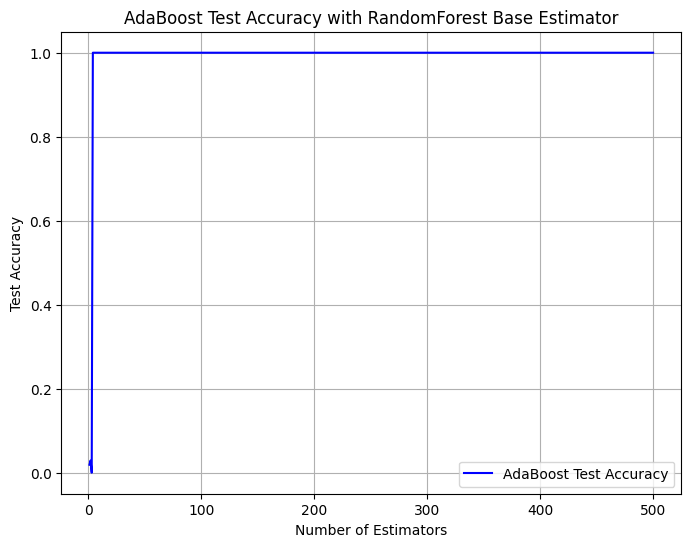

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_accuracy, label='Train Accuracy', color='green')
plt.plot(range(1, 501), accuracy, label='Test Accuracy', color='blue')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Train and Test Accuracy with RandomForest Base Estimator')
plt.legend()
plt.grid(True)
plt.show()